In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
# Loading the data
df = pd.read_csv('data/stud.csv')

In [3]:
#preparing dependent and independent features
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [4]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns # Numerical features
cat_features = X.select_dtypes(include="object").columns # Categorical features

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [5]:
# Fit and transform the data
x = preprocessor.fit_transform(X)

In [6]:
# seperating the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
# create and evaluate function to give all  metrics after training the model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

model_list = []
r2_list = []

# Train and evaluate each model
for i in range(len(models)):
   model = list(models.values())[i]
   model.fit(x_train, y_train) # Train model
   # Make predictions
   y_train_pred = model.predict(x_train)
   y_test_pred = model.predict(x_test)
   # Evaluate Train and Test dataset
   model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
   model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
   
   print(list(models.keys())[i])
   model_list.append(list(models.keys())[i])
   
   print('Model performance for Training set')
   print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
   print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
   print("- R2 Score: {:.4f}".format(model_train_r2))
   print('----------------------------------')
   
   print('Model performance for Test set')
   print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
   print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
   print("- R2 Score: {:.4f}".format(model_test_r2))
   r2_list.append(model_test_r2)
   
   print('='*35) # print separator
   print('\n')


Random Forest
Model performance for Training set
- Root Mean Squared Error: 2.2993
- Mean Absolute Error: 1.8232
- R2 Score: 0.9765
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0297
- Mean Absolute Error: 4.6803
- R2 Score: 0.8506


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.1737
- Mean Absolute Error: 6.4500
- R2 Score: 0.7254


KNN
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
------------------------------

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,Ridge Regression,0.880593
6,Linear Regression,0.880433
5,AdaBoost Regressor,0.853026
4,CatBoosting Regressor,0.851632
0,Random Forest,0.850587
3,XGBRegressor,0.827797
8,Lasso Regression,0.825320
2,KNN,0.783813
1,Decision Tree,0.725444


In [ ]:
# accuracy of lasso Regression model

lin_model = Lasso(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 82.53


In [ ]:
# accuracy of Linear Regression model

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


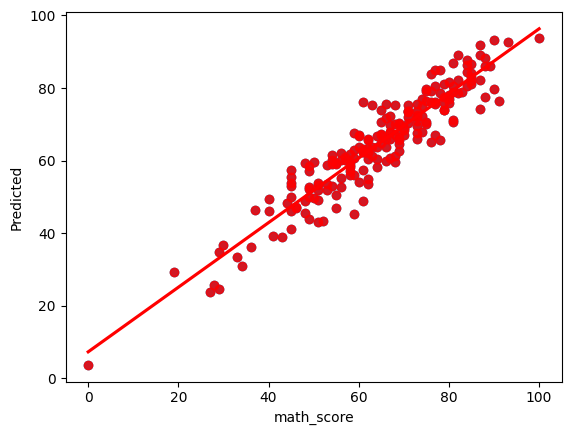

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#Difference between Actual and Predicted Values

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df